<h1>WGU D209 TASK 1 REV 2 - MATTINSON</h1>

<div style="text-align: center; 
    line-height: 48px;
    font-size: 24px; " >  
    KNN Classification Using Churn Data<br>
    Mike Mattinson<br>
    Master of Science, Data Analytics, WGU.edu<br>
    D209: Data Mining I<br>
    Task 1 - 1st Submission<br>
    Dr. Festus Elleh<br>
    October 28, 2021<br>
</div>

<h2>Part I: Research Question</h2>A.  Describe the purpose of this data mining report by doing the following:

<h3>A1. Propose <b>one</b> question relevant to a real-world organizational situation that you will answer using one of the following classification methods: (a) k-nearest neighbor (KNN) or (b) Naive Bayes.</h3>

<div style="font-family:Impact;">Primary Goal. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">The question has come up for a telecommunications company regarding churn. <b>Churn</b> is defined when a customer chooses to stop services. If the company has data on customers that have and have not churned in the past, is it possible to classify a new (or existing) customer based on their similarity to other customers with similar attributes that have and have not churned in the past. This analysis will consider two (2) attributes, <b>MonthlyCharge</b> and <b>Tenure</b> within the company's customer data of 10,000 customers. In addition, if the prediction is made, the analysis will also attempt to quantify the accuracy of the prediction.</span></div>

<h3>A2. Define <b>one</b> goal of the data analysis. Ensure that your goal is reasonable within the scope of the scenario and is represented in the available data.</h3>

<div style="font-family:Impact;">Primary Goal. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">The analysis will attempt to predict <b>Churn</b> for a new customer with values of <b>MonthlyCharge</b> = $170.00 and <b>Tenure</b> = 1.0. This goal is within the scope of the company's customer data, both attributes are contained with the data for 10,000 customers and should provide adequate data for the prediction. The analysis will use K-nearest neighbors (KNN) to classify the new customer based on the k-nearest other customers with similar attributes.</span></div>

In [1]:
# define new customer
import pandas as pd
newCustomer = pd.DataFrame([{'MonthlyCharge': 170.0 ,
                             'Tenure': 1.0}])

<h2>Part II: Method Justification</h2>B.  Explain the reasons for your chosen classification method from part A1 by doing the following:

<h3>B1. Explain how the classification method you chose analyzes the selected data set. Include expected outcomes.</h3>

<div style="font-family:Impact;">Explain Method. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">
KNN classification will look for similar attributes in the closest k-neighbors, that are in close proximity to the target value to be classified. It will decide which classification value occurs most frequently in those k-neighbors and then output a classification prediction based on those values. I would expect the results to show the target variable as it relates to the k-neighbors and accuracy summaries for the model.</span></div> 

<h3>B2. Summarize <b>one</b> assumption of the chosen classification method.</h3>

<div class="alert alert-block alert-warning">Under construction</div>

<h3>B3. List the packages or libraries you have chosen for <b>Python</b> or R, and justify how each item on the list supports the analysis.</h3>

In [2]:
# import and configure pandas
import pandas as pd
pd.set_option('precision',3)
pd.set_option('max_columns',9)
pd.set_option('display.width', None)

<div class="alert alert-block alert-warning">Under construction</div>

In [3]:
# import and configure scientific computing
import numpy as np
import scipy.stats as stats
#import statsmodels.api as sm
#import statsmodels.formula.api as smf

<div class="alert alert-block alert-warning">Under construction</div>

In [4]:
# import and configure sklearn
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors

<div class="alert alert-block alert-warning">Under construction</div>

In [5]:
# import and configure matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.rc("font", size=14)
%matplotlib inline
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

<div class="alert alert-block alert-warning">Under construction</div>

In [6]:
# helper function to plot hist overlay of feature and target data
def plot_hist_overlay(feature, fig, p, bins=8, target='Churn'):

    # data
    df_yes = df[df[target]==True][feature]
    df_no = df[df[target]==False][feature]
    
    # plot stacked hist
    ax = f.add_subplot() # here is where you add the subplot to f
    plt.hist([df_yes,df_no], bins=bins, stacked=True)
    
    # add title
    plt.title(feature + ' grouped by ' + target, size=16)
    
    # tick marks
    ax.set_xticks([])
    #ax.set_yticks([]) # use default
    
    # add axis labels
    plt.xlabel(feature)
    plt.ylabel('Count')
    
    # add legend
    ax.legend(['True','False'])

    return(f)

In [7]:
# helper function to plot a given dataset with the target data
def plotDataset(ax, data, xFeature, yFeature, target, neighbors, showLabel=True, **kwargs):
    
    # Churn == True
    subset = data.loc[data[target]==True]
    ax.scatter(subset[xFeature], subset[yFeature], marker='o',
              label=str(target)+'=True' if showLabel else None, color='C1', **kwargs)
    
    # Churn == False
    subset = data.loc[data[target]==False]
    ax.scatter(subset[xFeature], subset[yFeature], marker='D',
              label=str(target)+'=False' if showLabel else None, color='C0', **kwargs)
    
    # labels
    if len(neighbors) > 0:
        for idx, row in data.iterrows():
            ax.annotate(row.Number, (row[xFeature]+.2, row[yFeature]+.2))  

In [8]:
# helper function to standardize the format 
# a filename for figures and tables
COURSE = 'D209' # global
TASK = 'Task1' # global
FTYPE = 'PNG' # global

def getFilename(title: str, sect: str,
            caption: str, ftype = FTYPE,
            course = COURSE, task = TASK,
               subfolder='figures') -> str:
    """
    Prepare filename for a figure or table
    """
    temp = subfolder + '/'  # subfolder for tables and figures, default is 'fig'
    temp += COURSE + '_'
    temp += TASK + '_'
    temp += sect + '_'
    temp += subfolder[0:3] + " " +caption + '_' #
    temp += title
    temp += '.' + ftype

    return temp.replace(' ','_').upper()

In [9]:
f = getFilename('hello', sect='d2',
    subfolder='tables', caption='4 1', ftype='CSV' )
print(f)

TABLES/D209_TASK1_D2_TAB_4_1_HELLO.CSV


<h2>Part III: Data Preparation</h2>C.  Perform data preparation for the chosen data set by doing the following:

<h3>C1. Describe <b>one</b> data preprocessing goal relevant to the classification method from part A1.</h3>

<div style="font-family:Impact;">One Data Preprocessing Goal. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">
In order to apply the KNN classification analysis to this problem, the company data must be imported into the Python environment and then the raw numerical data must be normalized. In addition, the company data will be broken up into two (2) subsets, 70% in a training dataset, and the remain 30% in a testing or validation dataset. The KNN will then use the training set to build the model, and it will use the test set to validate the model. The main goal for data preparation will be to define these subsets of data is a manner that is as simple and intuitive as possible, to allow anyone to follow the analysis throughout the notebook. The following is a list of the planned data variables for this analysis:</span></div>

<ul style="line-height: 30px;">
    <li><b>df</b> = the raw set of 10,000 customer records
    <li><b>trainData</b> = a 70% subset of the raw data 
    <li><b>validData</b> = a 30% subset of the raw data
    <li><b>churnNorm</b> = the standardized set of 10,000 customer records
    <li><b>trainNorm</b> = a 70% subset of the standardized data. This will be created so that the index of records matches the index for <b>trainData</b>
    <li><b>validNorm</b> = a 30% subset of the standardized data. This will be created so that the index of the records matches the index for <b>validData</b>
    <li><b>X</b> the feature data from the standardized data (i.e. <b>MonthlyCharge</b>, and <b>Tenure</b>)
    <li><b>y</b> = the target data from the standardized data (i.e. <b>Churn</b>)
</ul>

<h3>C2. Identify the initial data set variables that you will use to perform the analysis for the classification question from part A1, and classify each variable as continuous or categorical.</h3>

In [10]:
# read subset of company's customer data from csv file
df = pd.read_csv('data/churn_clean.csv', 
        usecols=['MonthlyCharge','Tenure','Churn']) 

<div style="font-family:Impact;">Identify Initial Variables. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">
For this analysis, I will consider two (2) features, <b>MonthlyCharge</b> and <b>Tenure</b>, and one (1) target, <b>Churn</b>. Pandas is used to read the .CSV raw data file, the USECOLS option retrieves only selected data from the file.</span></div>

<ul style="line-height: 30px;">
    <li><b>MonthlyCharge</b> (FEATURE) the amount charged to the customer monthly, it reflects an average per customer
    <li><b>Tenure</b> (FEATURE) the number of months the customer has stayed with the provider
    <li><b>Churn</b> (TARGET) is whether the customer has discontinued service within the last month (yes, no).
</ul>

In [11]:
# describe target data
target = 'Churn'
print(df[target].describe())
print('Unique values: {}'.format(df[target].unique()))

count     10000
unique        2
top          No
freq       7350
Name: Churn, dtype: object
Unique values: ['No' 'Yes']


<div style= "font-weight: bold;font-size: large;border-top: solid;">TABLE 3.1. SELECTED RAW CUSTOMER DATA. THIS IS THE PRIMARY DATASET IDENTIFIED AS 'DF' OF RAW DATA. NOTICE CHURN VALUES (YES AND NO). <span style="font-size: normal;">Ref. (1) <a href="https://stackoverflow.com/questions/15017072/pandas-read-csv-and-filter-columns-with-usecols" target="_blank" rel:"noopener noreferrer">https://stackoverflow.com/questions/15017072/pandas-read-csv-and-filter-columns-with-usecols</a>(Ctrl+click to follow)</span></div>

In [12]:
# describe RAW CUSTOMER data
d = df
f = getFilename('DF RAW', sect='C2', 
        subfolder='tables', caption='3 1', ftype='CSV')
d.to_csv(f, index=True, header=True)
display(d.head())
print(d.info())
print('Table saved to: {}'.format(f))

,Churn,Tenure,MonthlyCharge
0,No,6.796,172.456
1,Yes,1.157,242.633
2,No,15.754,159.948
3,No,17.087,119.957
4,Yes,1.671,149.948


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Churn          10000 non-null  object 
 1   Tenure         10000 non-null  float64
 2   MonthlyCharge  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB
None
Table saved to: TABLES/D209_TASK1_C2_TAB_3_1_DF_RAW.CSV


<div style="font-family:Impact;">Data Cleaning. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Take care of a couple minor data cleaning items: (1) convert categorical Churn to numeric boolean, (2) re-index, (3) add row label, and (4) reorder columns. Ref: (1) <a href:"https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html" target="_blank">https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html</a></span></div>

In [13]:
# convert churn from object [Yes No] to bool [True False]
df['Churn'] = df['Churn'].replace({"No":False, "Yes":True})
df['Churn'] = df['Churn'].astype('bool')

# reset index
df.reset_index(drop=True, inplace=True)

# add a row label called 'Number'
df['Number'] = df.index

# reorder cols
columns=['MonthlyCharge','Tenure','Churn','Number']
df = df[columns]

<div style="font-family:Impact;">Sample Data. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Use the following code to reduce the dataset, use for trouble-shooting, etc.</span></div>

In [14]:
#df = df.sample(frac=0.01, random_state=13)
#display(df.head())
#print(df.info())

# or use .iloc[]
#df = df.iloc[::100, :] # every 100th row...

<div style="font-family:Impact;">Initial Variables. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Classify each variable as continuous or categorical.</span></div>

In [15]:
# identify the initial set of variables
for idx, c in enumerate(df.columns):
    if df.dtypes[c] in ('float', 'int', 'int64'):
        print('\n{}. {} is numerical (CONTINUOUS).'.format(idx+1, c))
    elif df.dtypes[c] == bool:
        print('\n{}. {} is boolean (BINARY): {}.'.format(idx+1,c,df[c].unique()))
    else:
        print('\n{}. {} is categorical (CATEGORICAL): {}.'.format(idx+1,c,df[c].unique()))


1. MonthlyCharge is numerical (CONTINUOUS).

2. Tenure is numerical (CONTINUOUS).

3. Churn is boolean (BINARY): [False  True].

4. Number is numerical (CONTINUOUS).


<div style= "font-weight: bold;font-size: large;border-top: solid;">TABLE 3.2. DESCRIBE NUMERIC FEATURE DATA. THESE ARE THE TRADITIONAL STATISTICS FOR THE NUMERICAL DATA</div>

In [16]:
# describe numeric feature data
d = df[['MonthlyCharge','Tenure']].describe()
f = getFilename('DF STATS', sect='c2',
       subfolder='tables', caption='3 2', ftype='CSV')
d.to_csv(f, index=True, header=True)
display(d)
print('Table saved to: {}'.format(f))

,MonthlyCharge,Tenure
count,10000.000,10000.000
mean,172.625,34.526
std,42.943,26.443
min,79.979,1.000
25%,139.979,7.918
50%,167.485,35.431
75%,200.735,61.480
max,290.160,71.999


Table saved to: TABLES/D209_TASK1_C2_TAB_3_2_DF_STATS.CSV


<div style="font-family:Impact;">Data Visualization. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Create plots to visualize target and target-feature data.</span></div>

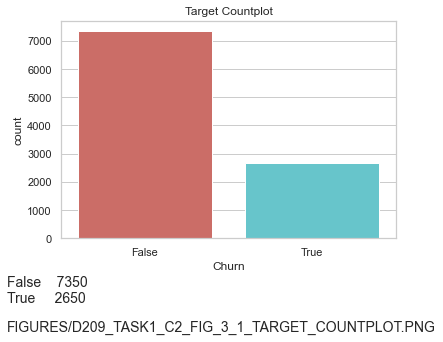

In [17]:
# visualize target data
fig, ax = plt.subplots()
sns.countplot(x=target, data=df, palette='hls')
title = 'Target Countplot'
plt.title(title)
f = getFilename(title, sect='c2',
       subfolder='figures', caption='3 1') # getFilename using helper
plt.gcf().text(0, -.2, f, fontsize=14) 

# include data table
plt.gcf().text(0, -.1, df[target].value_counts().to_string(), fontsize=14)  

fig.savefig(f, dpi=150, bbox_inches='tight')
plt.show()

<div style= "font-weight: bold;font-size: large;border-top: solid;">FIGURE 3-1. TARGET COUNTPLOT</div>

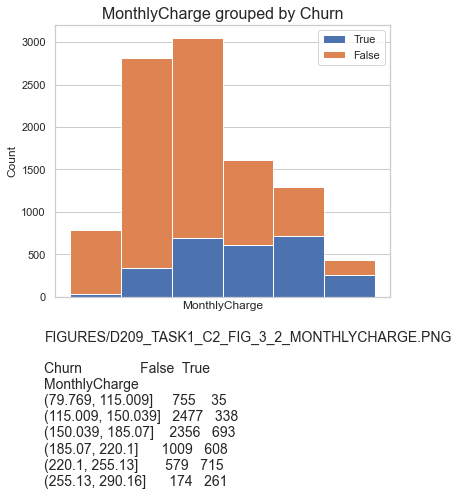

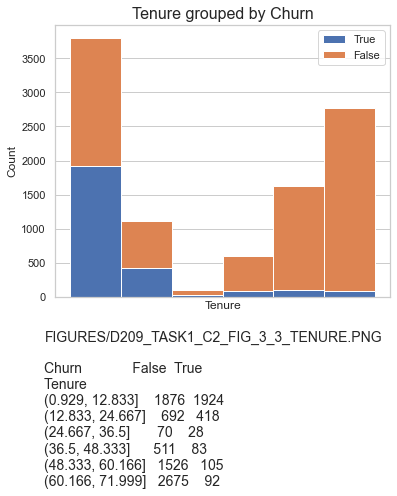

In [18]:
# create histogram with target overlay
target = 'Churn'
features = ['MonthlyCharge','Tenure']
bins = 6
for idx,fea in enumerate(features):
    fig_size = (6,5)
    f = plt.figure(figsize=fig_size)
    f = plot_hist_overlay(fea, fig=f, p=idx+1, bins=bins)
    file = getFilename(fea, sect='c2',
            subfolder='figures', caption='3 ' + str(idx+2)) # getFilename using helper
    plt.gcf().text(0.1, 0, file, fontsize=14) 
    
    # data table
    b = pd.cut(df[fea], bins=bins) # create bins (b) of numeric feature
    dt = pd.crosstab(df[target], b)
    plt.gcf().text(0.1, -.4, dt.T.to_string(), fontsize=14)
    
    f.savefig(file, dpi=150, bbox_inches='tight')

<div style= "font-weight: bold;font-size: large;border-top: solid;">FIGURE 3-2 AND FIGURE 3-3. CHURN GROUPED BY FEATURE. TOP FEATURE IS MONTHLYCHARGE. BOTTOM FEATURE IS TENURE</div>

<div style="font-family:Impact;">Summary. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">The company's customer raw data has been read into the df variable and consists of 10,000 customer records with three (3) variables each. Two (2) of the variables will be used as features and are continuous (numerical) data, and the the third variable is our target, binary variable.</span></div>

<h3>C3. Explain each of the steps used to prepare the data for the analysis. Identify the code segment for each step.</h3>

<div style="font-family: 'Impact';">Step 1.</div>Read in selected company data. Applicable customer data (<b>Churn</b>, <b>MonthlyCharge</b> and <b>Tenure</b>) from the company data was read into Python environment using pandas .read_cs() function using the usecols=[] option. This was completed in section C2 [9] above.

<div style="font-family: 'Impact';">Step 2.</div>Convert cateogrical data</div>Initially, the <b>Churn</b> variable was categorical, each row was Yes or No values, so this step converted the categorical data to boolean data using pandas .replace() function. In Python, boolean data is considered as numerical data, 1 or 0, or type(int). This was completed in section C2 [9] above.

<div style="font-family: 'Impact';">Step 3.</div>Describe initial set of variables</div>For each variable of data, describe the data whether numerical or categorical. I used a function I created to loop through and list each one and a short description. Also, use pandas .describe() method to show descriptive statistics for numerical data. This was completed in section C2 [10] and C2[11] above.

<div style="font-family: 'Impact';">Step 4.</div>Quick check for null values</div>The company data was previously cleaned and prepared, so I do not expect to find null values, but using the pandas .info() I can observe quickly that there are not any null values for any of the 10,000 customer records. This was completed in section C2 [12] above.

<h3>C4. Provide Clean Data</h3>Provide a copy of the cleaned data set.

<div style= "font-weight: bold;font-size: large;border-top: solid;">TABLE 3-3 CLEAN DATA</div>

In [19]:
# provide copy of cleaned data
d = df
f = getFilename('DF CLEAN', sect='c4',
        subfolder='tables', caption='3 3', ftype='CSV')
d.to_csv(f, index=True, header=True)
display(d.head())
print(d.columns.to_series().groupby(df.dtypes).groups)
print(d.info())
print('Shape (rows, cols): {}'.format(d.shape))
print('Table saved to: {}'.format(f))

,MonthlyCharge,Tenure,Churn,Number
0,172.456,6.796,False,0
1,242.633,1.157,True,1
2,159.948,15.754,False,2
3,119.957,17.087,False,3
4,149.948,1.671,True,4


{bool: ['Churn'], int64: ['Number'], float64: ['MonthlyCharge', 'Tenure']}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MonthlyCharge  10000 non-null  float64
 1   Tenure         10000 non-null  float64
 2   Churn          10000 non-null  bool   
 3   Number         10000 non-null  int64  
dtypes: bool(1), float64(2), int64(1)
memory usage: 244.3 KB
None
Shape (rows, cols): (10000, 4)
Table saved to: TABLES/D209_TASK1_C4_TAB_3_3_DF_CLEAN.CSV


<h2>Part IV Analysis</h2>D.  Perform the data analysis and report on the results by doing the following:

<h3>D1. Split the data into training and test data sets and provide the file(s).</h3>

In [20]:
# train test split raw data
trainData, validData = train_test_split(df, test_size=0.3, random_state=13)

<div style= "font-weight: bold;font-size: large;border-top: solid;">TABLE 4-4 TRAINING DATA</div>

In [21]:
# provide TRAIN data
d = trainData
f = getFilename('TRAIN DATA', sect='D1',
        subfolder='tables',caption='4 4', ftype='CSV')
d.to_csv(f, index=True, header=True)
display(d.head())
print(d.index)
print(d.info())
print('Shape (rows, cols): {}'.format(d.shape))
print('Table saved to: {}'.format(f))

,MonthlyCharge,Tenure,Churn,Number
4847,92.488,9.525,False,4847
9992,137.439,56.472,False,9992
4621,124.964,2.612,False,4621
5774,139.983,58.787,False,5774
9294,255.120,64.116,False,9294


Int64Index([4847, 9992, 4621, 5774, 9294, 1085, 1073,  950, 9512, 3773,
            ...
            6782, 9114, 4026, 8940,  153, 5876,  866, 7696,   74,  338],
           dtype='int64', length=7000)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 4847 to 338
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MonthlyCharge  7000 non-null   float64
 1   Tenure         7000 non-null   float64
 2   Churn          7000 non-null   bool   
 3   Number         7000 non-null   int64  
dtypes: bool(1), float64(2), int64(1)
memory usage: 225.6 KB
None
Shape (rows, cols): (7000, 4)
Table saved to: TABLES/D209_TASK1_D1_TAB_4_4_TRAIN_DATA.CSV


<div style= "font-weight: bold;font-size: large;border-top: solid;">TABLE 4-5 TEST DATA</div>

In [22]:
# provide TEST data
d = validData
f = getFilename('TEST DATA', sect='D1',
        subfolder='tables', caption='4 5', ftype='CSV')
d.to_csv(f, index=True, header=True)
display(d.head())
print(d.index)
print(d.info())
print('Shape (rows, cols): {}'.format(d.shape))
print('Table saved to: {}'.format(f))

,MonthlyCharge,Tenure,Churn,Number
5952,114.984,56.633,False,5952
1783,117.483,2.851,False,1783
4811,230.105,5.664,True,4811
145,217.473,2.733,True,145
7146,200.132,56.275,True,7146


Int64Index([5952, 1783, 4811,  145, 7146, 2452, 4051, 4311, 9715,  303,
            ...
            1442, 5091, 6525, 1241, 1161, 8654, 9777, 3727, 7848, 4977],
           dtype='int64', length=3000)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 5952 to 4977
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MonthlyCharge  3000 non-null   float64
 1   Tenure         3000 non-null   float64
 2   Churn          3000 non-null   bool   
 3   Number         3000 non-null   int64  
dtypes: bool(1), float64(2), int64(1)
memory usage: 96.7 KB
None
Shape (rows, cols): (3000, 4)
Table saved to: TABLES/D209_TASK1_D1_TAB_4_5_TEST_DATA.CSV


<h3>D2. Describe the analysis technique you used to appropriately analyze the data. Include screenshots of the intermediate calculations you performed.</h3>

<div style="font-family:Impact;">Data Exploratory Analysis. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">I will create a scatter plot of the two (2) features showing differences between Churn=True and Churn=False customers. I will plot the new customer in the same plot to see where the new and existing customers are similar. We will then see what we expect the classification results will yield in the end.</span></div>

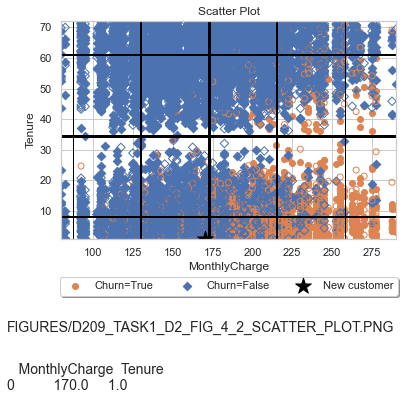

In [23]:
# scatter plot using the plotDataset() helper function
xFeature = 'MonthlyCharge' 
yFeature = 'Tenure'
target = 'Churn'
neighbors = []
fig, ax = plt.subplots()
#fig.set_size_inches(18.5, 10.5)
plotDataset(ax, trainData, xFeature, yFeature, target, neighbors)
plotDataset(ax, validData, xFeature, yFeature, target, neighbors, showLabel=False, facecolors='none')

# vertical lines for means for xFeature
c = 'black'
ax.axvline(trainData[xFeature].mean(), color=c, lw=3)
ax.axvline(trainData[xFeature].mean()+1*trainData[xFeature].std(), color=c, lw=2)
ax.axvline(trainData[xFeature].mean()-1*trainData[xFeature].std(), color=c, lw=2)
ax.axvline(trainData[xFeature].mean()+2*trainData[xFeature].std(), color=c, lw=1)
ax.axvline(trainData[xFeature].mean()-2*trainData[xFeature].std(), color=c, lw=1)

# horizontal lines for means for yFeature
c = 'black'
ax.axhline(trainData[yFeature].mean(), color=c, lw=3)
ax.axhline(trainData[yFeature].mean()+1*trainData[yFeature].std(), color=c, lw=2)
ax.axhline(trainData[yFeature].mean()-1*trainData[yFeature].std(), color=c, lw=2)
ax.axhline(trainData[yFeature].mean()+2*trainData[yFeature].std(), color=c, lw=1)
ax.axhline(trainData[yFeature].mean()-2*trainData[yFeature].std(), color=c, lw=1)

# plot new customer as a Star
ax.scatter(newCustomer.MonthlyCharge, newCustomer.Tenure, marker='*',
          label='New customer', color='black', s=270)

title = 'Scatter Plot'
plt.title(title)
plt.xlabel(xFeature) 
plt.ylabel(yFeature)
ax.set_xlim(df[xFeature].min(),df[xFeature].max())
ax.set_ylim(df[yFeature].min(),df[yFeature].max())

# configure legend
handles, labels = ax.get_legend_handles_labels()
patch = mpatches.Patch(color='grey', label='Manual Label')
handles.append(patch) 
plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)
# add customer data text
plt.gcf().text(0, -.4, newCustomer.to_string(), fontsize=14)     

f = getFilename(title, sect='d2',
                subfolder='figures', caption='4 2') # getFilename using helper
plt.gcf().text(0, -.2, f, fontsize=14) 
fig.savefig(f, dpi=150, bbox_inches='tight')
plt.show()

<div style= "font-weight: bold;font-size: large;border-top: solid;">FIGURE 4-2. SCATTER PLOT OF MONTHLYCHARGE VS TENURE FOR TRAINING SET (SOLID MARKERS) AND TEST SET (HOLLOW MARKERS) AND THE NEW CUSTOMER (STAR MARKER) TO BE CLASSIFIED.</div>Ref: (1) Textbook_____, Chapter 7, KNN.

<div style="font-family:Impact;">Scale Data. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">The z-score method (often called standardization) transforms the info into distribution with a mean of 0 and a typical deviation of 1. Each standardized value is computed by subtracting the mean of the corresponding feature then dividing by the quality deviation. I will use the sklearn .StandardScaler() method to create a standardized data set. Ref: (1) <a href="https://www.geeksforgeeks.org/data-normalization-with-pandas/" target="_blank" rel="noopener noreferrer">https://www.geeksforgeeks.org/data-normalization-with-pandas/</a></span></div>

In [24]:
# use training data to learn the transformation
scaler = preprocessing.StandardScaler()
scaler.fit(trainData[['MonthlyCharge','Tenure']])

StandardScaler()

In [25]:
# transform the full dataset
churnNorm = pd.concat([pd.DataFrame(scaler.transform(df[['MonthlyCharge','Tenure']]),
            columns=['zMonthlyCharge','zTenure']),
            df[['Churn','Number']]], axis=1)
trainNorm = churnNorm.iloc[trainData.index]
validNorm = churnNorm.iloc[validData.index]

<div style= "font-weight: bold;font-size: large;border-top: solid;">TABLE 4-6 SCALED CUSTOMER DATA INFO</div>

In [26]:
# provide SCALED data
d = churnNorm
f = getFilename('SCALED DATA', sect='D2',
        subfolder='tables', caption='4 6', ftype='CSV')
d.to_csv(f, index=True, header=True)
display(d.head())
print(d.index)
print('Table saved to: {}'.format(f))

,zMonthlyCharge,zTenure,Churn,Number
0,-0.008,-1.050,False,0
1,1.632,-1.263,True,1
2,-0.300,-0.710,False,2
3,-1.234,-0.660,False,3
4,-0.534,-1.244,True,4


RangeIndex(start=0, stop=10000, step=1)
Table saved to: TABLES/D209_TASK1_D2_TAB_4_6_SCALED_DATA.CSV


<div style="font-family:Impact;">Scale New Customer Data. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Use same scaler transformation to normalize the new customer data.</span></div>

In [27]:
# scale new customer data
newCustomerNorm = pd.DataFrame(scaler.transform(newCustomer),
        columns=['zMonthlyCharge', 'zTenure'])
print(newCustomerNorm.round(2))
print(newCustomer.round(2))

   zMonthlyCharge  zTenure
0           -0.07    -1.27
   MonthlyCharge  Tenure
0          170.0     1.0


<div style="font-family:Impact;">Find Nearest Training Neighbors. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Use KNN and scaled data to find k-nearest neighbors.</span></div>

In [28]:
# list neighbors from raw data
knn = NearestNeighbors(n_neighbors=7)
knn.fit(trainNorm.iloc[:,0:2])
distances, indices = knn.kneighbors(newCustomerNorm)
training_neighbors = df.iloc[indices[0],:]
#display(training_neighbors)

<div style= "font-weight: bold;font-size: large;border-top: solid;">TABLE 4-7 K-NEAREST "TRAINING" NEIGHBORS</div>

In [29]:
# provide SCALED data
d = training_neighbors
f = getFilename('TRAINING NEIGHBORS', sect='D2',
        subfolder='tables', caption='4 7', ftype='CSV')
d.to_csv(f, index=True, header=True)
display(d.head())
print('Table saved to: {}'.format(f))

,MonthlyCharge,Tenure,Churn,Number
5684,275.120,67.721,False,5684
4485,240.115,10.964,True,4485
3371,139.979,11.327,False,3371
6462,92.455,62.435,False,6462
1943,204.961,24.377,True,1943


Table saved to: TABLES/D209_TASK1_D2_TAB_4_7_TRAINING_NEIGHBORS.CSV


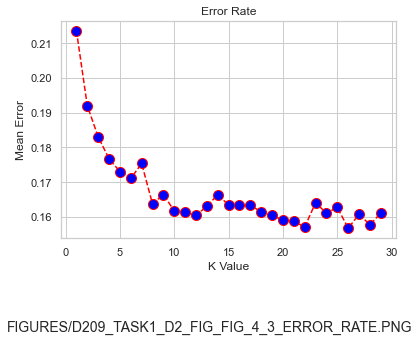

In [30]:
# Calculating and plot error rate for range of k-values
train_X = trainNorm[['zMonthlyCharge','zTenure']]
train_y = trainNorm['Churn']
valid_X = validNorm[['zMonthlyCharge','zTenure']]
valid_y = validNorm['Churn']
error = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_X, train_y)
    pred_i = knn.predict(valid_X)
    error.append(np.mean(pred_i != valid_y))
fig, ax = plt.subplots()
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
title = 'Error Rate'
plt.title(title)
plt.xlabel('K Value')
plt.ylabel('Mean Error')
f = getFilename(title, 'd2','fig 4 3') # getFilename using helper
plt.gcf().text(0, -.2, f, fontsize=14) 
fig.savefig(f, dpi=150, bbox_inches='tight')
plt.show()

<div style= "font-weight: bold;font-size: large;border-top: solid;">FIGURE 4-2. ERROR RATE BY K-VALUE</div>

<div style="font-family:Impact;">Final Prediction. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Calculate final prediction using the complete set of scaled data. Select a value for k from the figure above, let's select k=11 which looks like it should have about 84% accurary. Create a list of the neighbors in order to include highlighted neighbors on the next plot.</span></div>

In [31]:
# retrain with full data.
X = churnNorm[['zMonthlyCharge','zTenure']]
y = churnNorm['Churn']
knn = KNeighborsClassifier(n_neighbors=11).fit(X, y)
distances, indices = knn.kneighbors(newCustomerNorm)
print('Prediction: {}'.format(knn.predict(newCustomerNorm)))
df_neighbors = df.iloc[indices[0],:]
neighbors = df_neighbors.index
neighbors = neighbors.to_list()

Prediction: [ True]


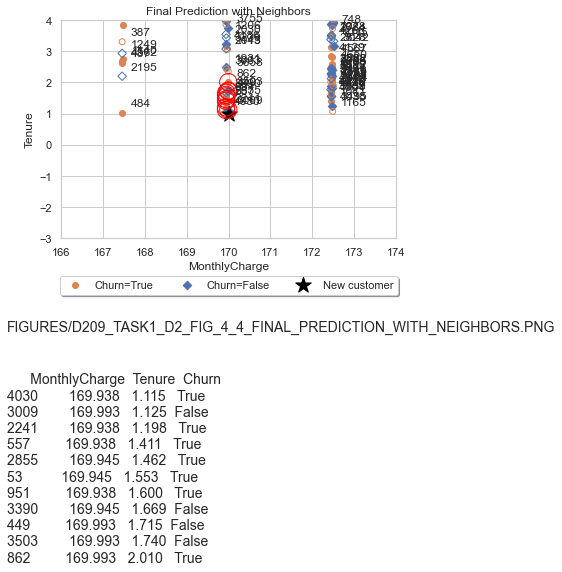

In [32]:
# scatter plot using the plotDataset() helper function
xFeature = 'MonthlyCharge' 
yFeature = 'Tenure'
fig, ax = plt.subplots()
plotDataset(ax, trainData, xFeature, yFeature, target, neighbors)
plotDataset(ax, validData, xFeature, yFeature, target, neighbors, showLabel=False, facecolors='none')

# plot new customer as a Star
ax.scatter(newCustomer.MonthlyCharge, newCustomer.Tenure, marker='*',
          label='New customer', color='black', s=270)

# highlight neighbors with red circles
if len(neighbors) > 0:
    for n in neighbors:
        point = df.iloc[n]
        ax.scatter(point.MonthlyCharge, point.Tenure, marker='o',
                color='red', s=300, facecolors='none')

title = 'Final Prediction with Neighbors'
plt.title(title)
plt.xlabel(xFeature) 
plt.ylabel(yFeature)

# set axis limits centered around the new customer
left = float(newCustomer.MonthlyCharge) - 4
right = float(newCustomer.MonthlyCharge) + 4
top = float(newCustomer.Tenure) - 4
bottom = float(newCustomer.Tenure) + 3
ax.set_xlim(left,right)
ax.set_ylim(top,bottom)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)
#plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol= 2)
f = getFilename(title, sect='d2',
        subfolder='figures', caption='4 4') # getFilename using helper
plt.gcf().text(0, -.2, f, fontsize=14) 

# loop through neighbors and include neighbor as table data
#for idx,n in enumerate(df_neighbors.iloc[:, 0:3]):
#    plt.gcf().text(0, -.5+(.05*idx), n, fontsize=10) 
plt.gcf().text(0, -1, df_neighbors.iloc[:, 0:3].to_string(), fontsize=14)     

fig.savefig(f, dpi=150, bbox_inches='tight')
plt.show()

<div style= "font-weight: bold;font-size: large;border-top: solid;">FIGURE 4-4. FINAL CLASSIFICATION OF NEW CUSTOMER WITH NEIGHBORS (RED CIRLCES) USED TO CLASSIFY WITH THE NEIGHBOR DATA SORTED BY DISTANCE FROM NEW CUSTOMER. INCLUDE DATA TABLE USING .to_string() method. Adjust plot so that text does not get cut off at bottom.</div>Ref: (1) https://stackabuse.com/how-to-iterate-over-rows-in-a-pandas-dataframe/, (2) https://www.youtube.com/watch?v=C8MT-A7Mvk4&ab_channel=KimberlyFessel

<div style="font-family:Impact;">Summary. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">The KNN model calculated the new customer as Churn=False, with all of the three (3) nearest neighbors having Churn=False, which is what we expected.</span></div>

<h3>D3. Provide the code used to perform the classification analysis from part D2.</h3>

<div style="font-family:Impact;">Code. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">All code and output is contained within this Jupyter notebook. The notebook file is called <b>D209_1_x.ipynb</b> and the associated PDF version is called <b>D209_1_x - Jupyter Notebook.pdf</b>.</span></div>

<h2>Part V: Data Summary and Implications</h2>

<h3>E1. Explain the accuracy and the area under the curve (AUC) of your classification model.</h3>

<div style="font-family:Impact;">Confusion and Classification Report. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Look at confusion and classification report to determine overall accuracy of the KNN model.</span></div>

<div style= "font-weight: bold;font-size: large;border-top: solid;">TABLE 5-1. CONFUSION MATRIX AND THE CLASSIFICATION REPORT SHOWING MODEL ACCURARY</div>

In [33]:
# confusion and classification report
classifier = KNeighborsClassifier(n_neighbors=11)
classifier.fit(X, y)
y_pred = classifier.predict(X)
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[[6810  540]
 [ 917 1733]]
              precision    recall  f1-score   support

       False       0.88      0.93      0.90      7350
        True       0.76      0.65      0.70      2650

    accuracy                           0.85     10000
   macro avg       0.82      0.79      0.80     10000
weighted avg       0.85      0.85      0.85     10000



<div style="font-family:Impact;">Receiver Operation Characteristic (ROC) ad Area Under Curve (AUC). <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Calculate and plot ROC and AOUC. Add custom text annotation to the plot. Ref: (1) <a HREF="https://stackoverflow.com/questions/42435446/how-to-put-text-outside-python-plots" target="_blank" rel="noopener noreferrer">https://stackoverflow.com/questions/42435446/how-to-put-text-outside-python-plots</a>, (2) <a href="https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html" target="_blank" rel="noopener noreferrer">https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html</a>, (3) <a href="https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python" target="_blank" rel="noopener noreferrer">https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python</a> and (4) <a href="https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5" target="_blank" rel="noopener noreferrer">https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5</a></span></div>

In [34]:
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y, y_pred)
auc = metrics.auc(fpr, tpr)

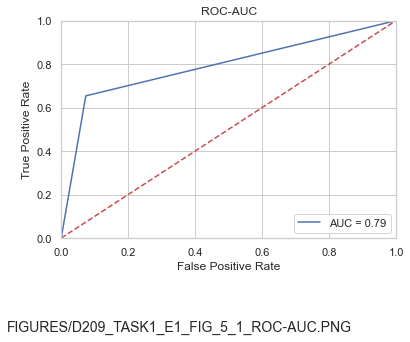

In [35]:
# method I: plt
fig, ax = plt.subplots()
title = 'ROC-AUC'
plt.title(title)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
f = getFilename(title, sect='e1',
    subfolder='figures', caption='5 1') # getFilename using helper
#plt.gcf().text(0, -.1, 'Area Under Curve (AUC): {:.2f}'.format(auc), fontsize=14) 
plt.gcf().text(0, -.2, f, fontsize=14) 
fig.savefig(f, dpi=150, bbox_inches='tight')
plt.show()

<div style= "font-weight: bold;font-size: large;border-top: solid;">FIGURE 5-1. RECEIVER OPERATION CHARACTERISTIC (ROC)</div>

<h2 data-nbr="E2">Discuss Results and Implications</h2>Discuss the results and implications of your classification analysis.

<div style="font-family:Impact;">Summary. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Looks like $6810+1733 = 8543$ predictions on the diagonal were correct for an accuracy of about 85.4%. Analysis predicts 85% that the new customer is Churn=True, so, therefore, there is also the 11% chance that the new customer is actually Churn=False.</span></div>

<h3>E3. Discuss <b>one</b> limitation of your data analysis.</h3>

<div style="font-family:Impact;">Limitations. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">It occus to me that a new customer is new, that is, their <b>Tenure</b> will always be low compared to other existing customers. The KNN analysis will never make it to the higher <b>Tenure</b> numbers. Future study may look at other features instead such as <b>Income</b>, <b>Bandwidth_GB_Year</b>, or <b>Outage_sec_perweek</b> which may provide better insight.</span></div>

<h3>E4. Recommend a course of action for the real-world organizational situation from part A1 based on your results and implications discussed in part E2.</h3>

<div class="alert alert-block alert-warning">Under construction</div>

Recommend_____

<h2>Part VI: Demonstration</h2>

<h3>F. Provide a Panopto video recording that includes a demonstration of the functionality of the code used for the analysis and a summary of the programming environment.</h3>

<div style="font-family:Impact;">Video. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Panapto video was created and is located at: <a href="https://wgu.edu" target="_blank" rel="noopner noreferrer">https://wgu.edu</a></span></div>

<h3>G. Record the web sources used to acquire data or segments of third-party code to support the analysis. Ensure the web sources are reliable.</h3>

<div style="font-family:Impact;">Configure Scrollbars. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Disable scrollbars in notebook.</span></div>

In [36]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

<div style="font-family:Impact;">Disable Auto Scroll. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Disable automatically scroll to bottom.</span></div>

In [37]:
%%javascript
require("notebook/js/notebook").Notebook.prototype.scroll_to_bottom = function () {}

<IPython.core.display.Javascript object>

<div style="font-family:Impact;">Toggle Notebook Warnings. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Use the following code to toggle warning messages in the notebook. Another piece of code courtesy of stackoverflow (2021). <a href="https://stackoverflow.com/questions/9031783/hide-all-warnings-in-ipython" target="_blank" rel="">https://stackoverflow.com/questions/9031783/hide-all-warnings-in-ipython</a></span></div>

In [38]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

<div style="font-family:Impact;">Terminal List Files. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">List all of the  files from the current working directory. Ref: (1) <a href="https://www.youtube.com/watch?v=C8MT-A7Mvk4&ab_channel=KimberlyFessel" target="_blank" rel="https://www.youtube.com/watch?v=C8MT-A7Mvk4&ab_channel=KimberlyFessel">Fessel, K. (2021). How to save a matplotlib figure and fix text cutting off || Matplotlib Tips</a> Retrieved from https://www.youtube.com/watch?v=C8MT-A7Mvk4&ab_channel=KimberlyFessel</span></div>

In [39]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [40]:
!du -h *.*

'du' is not recognized as an internal or external command,
operable program or batch file.


<div style="font-family:Impact;">List Installed Packages. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">List of all installed PIP packages and the versions.</div>Ref: (1) https://pip.pypa.io/en/stable/cli/pip_list/

In [41]:
!pip list

Package                           Version
--------------------------------- ---------
anyio                             3.3.4
argon2-cffi                       21.1.0
attrs                             21.2.0
Babel                             2.9.1
backcall                          0.2.0
bleach                            4.1.0
certifi                           2021.10.8
cffi                              1.15.0
charset-normalizer                2.0.7
colorama                          0.4.4
cycler                            0.10.0
debugpy                           1.5.1
decorator                         5.1.0
defusedxml                        0.7.1
entrypoints                       0.3
idna                              3.3
ipykernel                         6.4.2
ipython                           7.28.0
ipython-genutils                  0.2.0
jedi                              0.18.0
Jinja2                            3.0.2
joblib                            1.1.0
json5                       

<div class="impact" data-hdr="UPDATE PACKAGE WITHIN NOTEBOOK">Update a specific package within notebook.</div>Ref: (1) https://stackoverflow.com/questions/54453219/why-can-i-see-pip-list-sklearn-but-not-in-jupyter-when-i-run-a-code

In [42]:
!python -m pip install -U scikit-learn

<div style="font-family:Impact;">Merget Two Dataframes. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Code to merge two dataframes. Ref: (1) https://stackoverflow.com/questions/26265819/how-to-merge-a-series-and-dataframe</span></div>

In [43]:
# merge X and y back together, for example
d = X.merge(y, left_index=True, right_index=True)
display(d.head())

,zMonthlyCharge,zTenure,Churn
0,-0.008,-1.050,False
1,1.632,-1.263,True
2,-0.300,-0.710,False
3,-1.234,-0.660,False
4,-0.534,-1.244,True


<div style="font-family:Impact;">List .index() Function. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">The .index() method returns the index of the specified element in the list. Ref: (1) https://www.programiz.com/python-programming/methods/list/index</span></div>

In [44]:
animals = ['cat', 'dog', 'rabbit', 'horse']
# get the index of 'dog'
index = animals.index('dog')
print(index)

1


<div style="font-family:Impact;">Row Index Names in Pandas. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Code to get rows/index names in a Pandas dataframe. Ref: (1) https://www.geeksforgeeks.org/how-to-get-rows-index-names-in-pandas-dataframe/</span></div>

In [45]:
# making data frame 
data = df
  
# calling head() method  
# storing in new variable 
data_top = data.head() 
    
# iterating the columns
for row in data_top.index:
    print(row, end = " ")

0 1 2 3 4 

<div style="font-family:Impact;">Tutorial Python Subplots. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Tutorial: Python Subplots Ref: (1) https://www.kaggle.com/asimislam/tutorial-python-subplots</span></div>

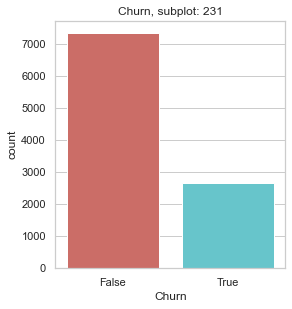

In [46]:
#  Categorical Data
heart_CAT = ['Churn']

#  Categorical Data
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,10))

for i in heart_CAT:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.countplot(x=i, data=df, palette='hls')
    c = c + 1

plt.show()

<div style="font-family:Impact;">PASS FIG TO CUSTOM PLOT FUNCTION. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">A great way to do this is to pass a figure object to your code and have your function add an axis then return the updated figure. Here is an example: Ref: (1) https://stackoverflow.com/questions/43925337/matplotlib-returning-a-plot-object</span></div>

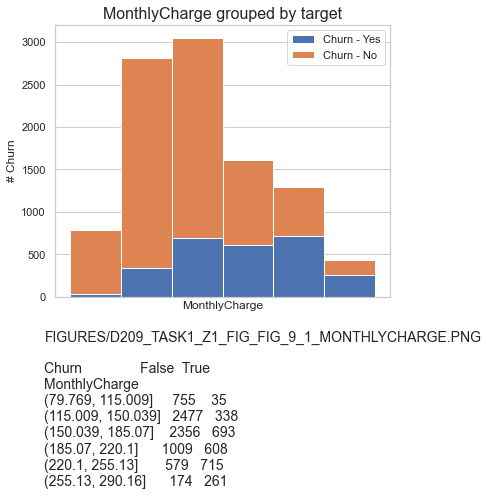

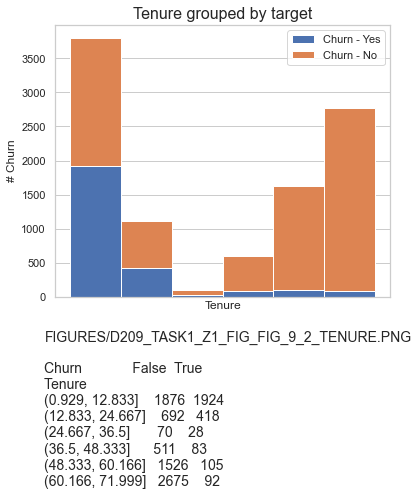

In [47]:
def plot_hist_overlay(feature, fig, p, bins=8):

    # data
    df_yes = df[df.Churn==True][feature]
    df_no = df[df.Churn==False][feature]
    
    # plot stacked hist
    ax = f.add_subplot() # here is where you add the subplot to f
    plt.hist([df_yes,df_no], bins=bins, stacked=True)
    
    # add title
    plt.title(feature + ' grouped by target', size=16)
    
    # tick marks
    ax.set_xticks([])
    #ax.set_yticks([]) # use default
    
    # add axis labels
    plt.xlabel(feature)
    plt.ylabel('# Churn')
    
    # add legend
    ax.legend(['Churn - Yes','Churn - No'])

    return(f)

target = 'Churn'
features = ['MonthlyCharge','Tenure']
bins = 6
for idx,fea in enumerate(features):
    fig_size = (6,5)
    f = plt.figure(figsize=fig_size)
    f = plot_hist_overlay(fea, fig=f, p=idx+1, bins=bins)
    file = getFilename(fea, 'z1','fig 9 ' + str(idx+1)) # getFilename using helper
    plt.gcf().text(0.1, 0, file, fontsize=14) 
    
    # data table
    b = pd.cut(df[fea], bins=bins) # create bins (b) of numeric feature
    dt = pd.crosstab(df[target], b)
    plt.gcf().text(0.1, -.4, dt.T.to_string(), fontsize=14)
    #print(dt.T)
    
    f.savefig(file, dpi=150, bbox_inches='tight')

#f = plot_hist_overlay('MonthlyCharge', fig=f, p=3)
#f = plot_hist_overlay('Tenure', fig=f, p=2)

<div style="font-family:Impact;">Enabling Jupyter Notebook extensions. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;"> Ref: (1) https://tljh.jupyter.org/en/latest/howto/admin/enable-extensions.html</span></div>

<div style="font-family:Impact;">How to Use HTML to Open a Link in a New Tab. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;"> Ref: (1)https://www.freecodecamp.org/news/how-to-use-html-to-open-link-in-new-tab/</span></div>

<div style="font-family:Impact;">CSS Tutorial. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;"> This is a great resource for CSS code with many examples. Ref: (1)https://www.w3schools.com/css/default.asp</span></div>

<div style="font-family:Impact;">HTML Tutorial. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;"> This is a great resource for HTML code with many examples. Ref: (1)https://www.w3schools.com/html/default.asp</span></div>

<div style="font-family:Impact;">Inline Styles in HTML. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;"> Usually, CSS is written in a separate CSS file (with file extension .css) or in a 'style' tag inside of the 'head' tag, but there is a third place which is also valid. The third place you can write CSS is inside of an HTML tag, using the style attribute. When CSS is written using the style attribute, it’s called an “inline style”. In general, this is not considered a best practice. However, there are times when inline styles are the right (or only) choice. Ref: (1) https://www.codecademy.com/articles/html-inline-styles</span></div>

<h3>H. Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.</h3>

<div style="font-family:'Impact';">Robinson, S. (2021, October). K-Nearest Neighbors Algorithm in Python and Scikit-Learn</div>https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/ The K-nearest neighbors (KNN) algorithm is a type of supervised machine learning algorithms. KNN is extremely easy to implement in its most basic form, and yet performs quite complex classification tasks. It is a lazy learning algorithm since it doesn't have a specialized training phase. Rather, it uses all of the data for training while classifying a new data point or instance. KNN is a non-parametric learning algorithm, which means that it doesn't assume anything about the underlying data. This is an extremely useful feature since most of the real world data doesn't really follow any theoretical assumption e.g. linear-separability, uniform distribution, etc.

<div class="alert alert-block alert-warning">Under construction</div>

Need to add all of the other textbooks used.
